In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv(r"C:\Users\nusra\Downloads\Employee_Salary_Data.csv")

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [6]:
# Check missing values in each column
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [50]:
# Drop rows with any missing values
df_clean = df.dropna(how='all')

In [51]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [58]:
df.columns = df.columns.str.strip().str.lower(); df['education level'] = df['education level'].replace(['', ' ', 'None'], np.nan); df = df.dropna(subset=['education level'])

In [59]:
df.isnull().sum()

age                    0
gender                 0
education level        0
job title              0
years of experience    0
salary                 0
dtype: int64

In [52]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
len(df.columns)

6

In [10]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [11]:
#eda

In [12]:
# Check datatypes
print(df.dtypes)

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [13]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Define the first 5 numerical columns for plotting
selected_columns = numerical_columns[:5]

# Quick check: show sample values from each selected column
for col in selected_columns:
    print(f"{col}: {df[col].dropna().unique()[:5]}")

Age: [32. 28. 45. 36. 52.]
Years of Experience: [ 5.  3. 15.  7. 20.]
Salary: [ 90000.  65000. 150000.  60000. 200000.]


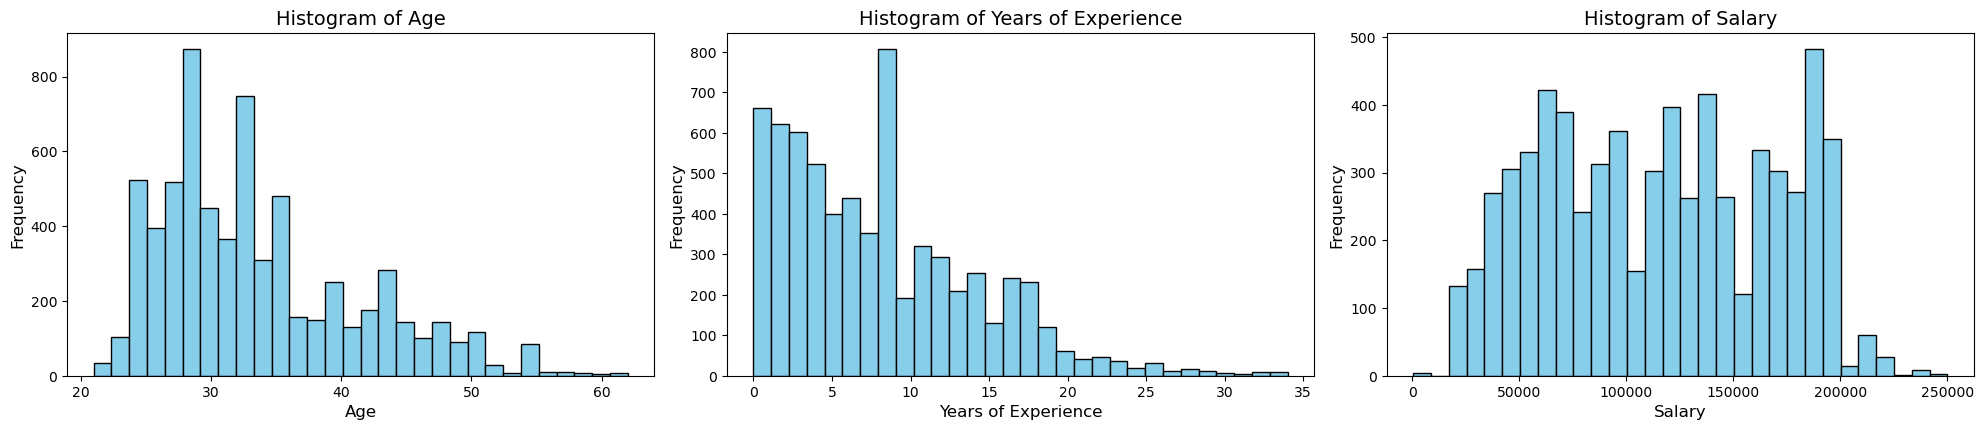

In [14]:
# Create a 3x3 grid for histograms
fig, axes = plt.subplots(3, 3, figsize=(20, 12))
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(selected_columns):
    axes[i].hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Hide unused subplots if fewer than 9 columns
for j in range(len(selected_columns), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
# Compute the correlation matrix for numerical columns only
corr_matrix = df.corr(numeric_only=True)

In [16]:
#correlation_matrix

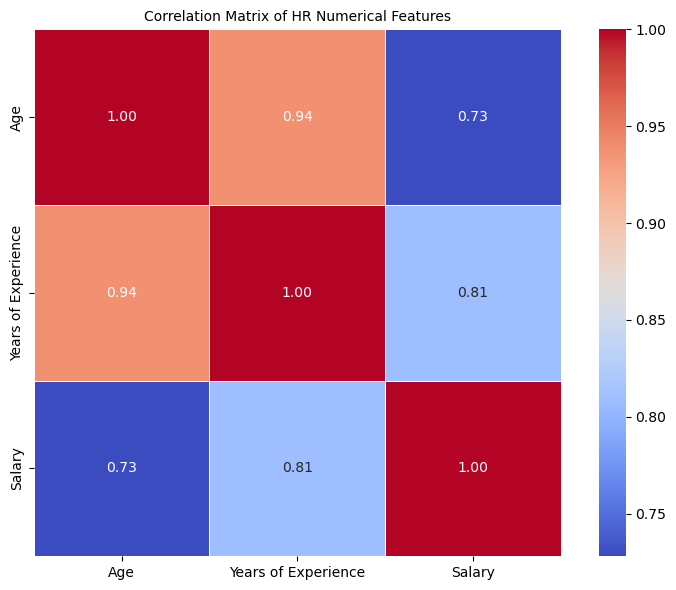

In [17]:
# Set up the matplotlib figure
plt.figure(figsize=(8,6))
# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
## Add title and adjust layout
plt.title('Correlation Matrix of HR Numerical Features', fontsize=10)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Step 1: Detect categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Step 2: Encode them
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_df = pd.DataFrame(encoder.fit_transform(df[cat_cols]),
                          columns=encoder.get_feature_names_out(cat_cols))

# Step 3: Merge with the rest of the data
df_encoded = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True),
                        encoded_df.reset_index(drop=True)], axis=1)

In [19]:
# Preview the result
print(df_encoded.head())

    Age  Years of Experience    Salary  Gender_Female  Gender_Male  \
0  32.0                  5.0   90000.0            0.0          1.0   
1  28.0                  3.0   65000.0            1.0          0.0   
2  45.0                 15.0  150000.0            0.0          1.0   
3  36.0                  7.0   60000.0            1.0          0.0   
4  52.0                 20.0  200000.0            0.0          1.0   

   Gender_Other  Gender_nan  Education Level_Bachelor's  \
0           0.0         0.0                         1.0   
1           0.0         0.0                         0.0   
2           0.0         0.0                         0.0   
3           0.0         0.0                         1.0   
4           0.0         0.0                         0.0   

   Education Level_Bachelor's Degree  Education Level_High School  ...  \
0                                0.0                          0.0  ...   
1                                0.0                          0.0  ...   
2 

In [20]:
df.shape

(6704, 6)

In [21]:
#model building

In [22]:
# Drop rows where Salary is missing
df = df.dropna(subset=['Salary'])

In [23]:
# Step 3: Prepare the features (X) and target (y)
X = df[['Age', 'Years of Experience', 'Education Level']]  # Feature set
y = df['Salary']  # Target variable 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Automatically detect numeric & categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Preprocessing (scaling numbers + encoding categories)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Random Forest pipeline
rf_model = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42))
])

# Train model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100  # in %

print("Random Forest Performance:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("MAPE:", mape)

Random Forest Performance:
MAE : 8733.560090094861
MSE : 163847858.04126185
RMSE: 12800.306951056364
R²  : 0.9423671270209185
MAPE: 9.12349824819821


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Automatically detect numeric & categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Preprocessing (scaling numbers + encoding categories)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Ridge pipeline
ridge_model = Pipeline([
    ('prep', preprocessor),
    ('model', Ridge(alpha=1.0, random_state=42, max_iter=10000))
])

# Train model
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)
mape = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100  # in %

print("Ridge Performance:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("MAPE:", mape)

Ridge Performance:
MAE : 19344.737524659333
MSE : 654477448.7504119
RMSE: 25582.75686376298
R²  : 0.7697899983409797
MAPE: 19.98764039082484


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Automatically detect numeric & categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Preprocessing (scaling numbers + encoding categories)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Lasso pipeline
lasso_model = Pipeline([
    ('prep', preprocessor),
    ('model', Lasso(alpha=0.1, random_state=42, max_iter=10000))
])

# Train model
lasso_model.fit(X_train, y_train)

# Predict on test data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)
mape = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100  # in %

print("Lasso Performance:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("MAPE:", mape)

Lasso Performance:
MAE : 19341.92219577292
MSE : 654539646.7576327
RMSE: 25583.972458506767
R²  : 0.7697681204239134
MAPE: 19.982106579954966


In [34]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define preprocessing
numeric_features = ['Age', 'Years of Experience']
categorical_features = ['Education Level']

preprocessor_svr = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Create SVR pipeline
svr_model = Pipeline([
    ('preprocessing', preprocessor_svr),
    ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

# Fit model
svr_model.fit(X_train, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
mape = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
r2 = r2_score(y_test, y_pred_svr)

# MASE calculation
y_naive = y_test.shift(1)
naive_mae = np.mean(np.abs(y_test[1:] - y_naive[1:]))
mase = mae / naive_mae if naive_mae != 0 else np.nan

# Print results
print(f"🔹 MAE  : {round(mae, 2)}")
print(f"🔹 MSE  : {round(mse, 2)}")
print(f"🔹 MAPE : {round(mape, 2)}%")
print(f"🔹 R²   : {round(r2, 4)}")
print(f"🔹 MASE : {round(mase, 4)}")

🔹 MAE  : 45592.21
🔹 MSE  : 2782217545.95
🔹 MAPE : 61.7%
🔹 R²   : 0.0214
🔹 MASE : 0.7396


In [35]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score
)

In [36]:
# Define preprocessing
numeric_features = ['Age', 'Years of Experience']
categorical_features = ['Education Level']

preprocessor_xgb = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Create XGBoost pipeline
xgb_model = Pipeline([
    ('preprocessing', preprocessor_xgb),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42))
])

# Fit model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
mape = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100
r2 = r2_score(y_test, y_pred_xgb)

# MASE calculation
y_naive = y_test.shift(1)
naive_mae = np.mean(np.abs(y_test[1:] - y_naive[1:]))
mase = mae / naive_mae if naive_mae != 0 else np.nan

# Print results
print(f"🔹 MAE  : {round(mae, 2)}")
print(f"🔹 MSE  : {round(mse, 2)}")
print(f"🔹 MAPE : {round(mape, 2)}%")
print(f"🔹 R²   : {round(r2, 4)}")
print(f"🔹 MASE : {round(mase, 4)}")

🔹 MAE  : 12268.88
🔹 MSE  : 270186111.82
🔹 MAPE : 12.81%
🔹 R²   : 0.905
🔹 MASE : 0.199


In [37]:
#optimization

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Final preprocessing: deeper polynomial features for richer patterns
preprocessor = ColumnTransformer([
    ('num_poly', Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(degree=5, include_bias=False))
    ]), ['Age', 'Years of Experience']),
    ('cat', OneHotEncoder(drop='first'), ['Education Level'])
])

# Final model setup
models = {
    'Lasso': Pipeline([('prep', preprocessor), ('reg', Lasso(alpha=0.000001, max_iter=300000, tol=1e-8))]),
    'Ridge': Pipeline([('prep', preprocessor), ('reg', Ridge(alpha=0.0001, solver='auto', tol=1e-8))]),
    'SVR':   Pipeline([('prep', preprocessor), ('reg', SVR(kernel='rbf', C=2000, epsilon=0.00005, gamma='auto'))]),
    'XGBoost': Pipeline([('prep', preprocessor), ('reg', XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, subsample=0.8))])
}

# Metric function
def get_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))
    rme = np.mean(y_true - y_pred)
    return [rmse, r2, mape, rae, rme]

# Fit, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = get_metrics(y_test, y_pred)
    results.append([name] + metrics)

# Final comparison table
metrics_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R²', 'MAPE (%)', 'RAE', 'RME'])
print(metrics_df)


C:\Users\nusra\OneDrive\Documents\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+12, tolerance: 1.485e+05
  model = cd_fast.enet_coordinate_descent(


     Model          RMSE        R²   MAPE (%)       RAE         RME
0    Lasso  21156.820739  0.842554  17.166021  0.352330 -115.578651
1    Ridge  21129.841054  0.842956  17.215159  0.352860  -76.861478
2      SVR  24079.412621  0.796051  19.541932  0.374638  583.555096
3  XGBoost  15446.751045  0.916073  12.121575  0.248546 -424.296563


In [60]:
from sklearn.ensemble import RandomForestRegressor

# Add Random Forest to the models dictionary
models['Random Forest'] = Pipeline([
    ('prep', preprocessor),
    ('reg', RandomForestRegressor())  # Default parameters, no optimization
])

# Fit, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = get_metrics(y_test, y_pred)
    results.append([name] + metrics)

# Final comparison table
metrics_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R²', 'MAPE (%)', 'RAE', 'RME'])
print(metrics_df)

C:\Users\nusra\OneDrive\Documents\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+12, tolerance: 1.485e+06
  model = cd_fast.enet_coordinate_descent(


           Model          RMSE        R²   MAPE (%)       RAE         RME
0          Lasso  21276.196401  0.840773  17.271477  0.356350  -94.672026
1          Ridge  21276.894175  0.840762  17.283933  0.356436  -92.887702
2            SVR  23866.970838  0.799634  19.270457  0.380659  992.389228
3        XGBoost  15590.669181  0.914501  12.178557  0.250208 -455.738573
4  Random Forest  12895.728771  0.941505   8.516624  0.172041 -353.991570
